In [1]:
import os, warnings
warnings.simplefilter('ignore')

import ee
#ee.Authenticate()
ee.Initialize()

In [2]:
#change directory
os.chdir('../../')

In [3]:
from functions import extract_ee, extract_osm, plot, operations

In [4]:
boundary_path = 'data/test_study_area.geojson' #part of Ahmedabad city

In [5]:
# last major heat wave event in India
start_date = '2019-05-01'
end_date = '2019-07-01'

In [6]:
#extract L8 LST
l8_lst = extract_ee.extract_landsat8_lst(boundary_path, start_date, end_date)

#convert ee to xarray
l8_lst_xr = extract_ee.convert_ee_to_xarray(l8_lst, boundary_path, start_date, scale=30)

#save xarray dataset as TIFF file
l8_lst_xr.rio.to_raster('data/test_l8_lst.tiff')

Downloading:   0%|          | 0.00/28.5k [00:00<?, ?iB/s]

In [7]:
#extract MODIS Terra LST
modis_lst_day, modis_lst_night = extract_ee.extract_modisterralst(boundary_path, start_date, end_date)

In [8]:
#extract parks and non-park area from OSM
park, non_park = extract_osm.extract_osm_parks(boundary_path)

#save park and non-park as geojson
park.to_file('data/test_park.geojson')
park.dissolve().to_file('data/test_park_dissolve.geojson')
non_park.to_file('data/test_non_park.geojson')

In [9]:
#calculate zonal stats of parks
park_zs = operations.calculate_zonalstats('data/test_park.geojson', 'data/test_l8_lst.tiff')
park_all_zs = operations.calculate_zonalstats('data/test_park_dissolve.geojson', 'data/test_l8_lst.tiff')
non_park_zs = operations.calculate_zonalstats('data/test_non_park.geojson', 'data/test_l8_lst.tiff')

C:\Users\Vinamra.Bharadwaj\anaconda3\envs\py310\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Vinamra.Bharadwaj\anaconda3\envs\py310\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [10]:
park_zs

,index,osmid,name,geometry,mean,max,min,sum,std,var,count
0,1,317787177,Bansidhar Garden,"POLYGON ((72.55380 23.00042, 72.55427 22.99949...",44.226569,44.607764,43.961608,707.625111,0.183955,0.033840,16.0
1,2,330926672,Sukhipura Park,"POLYGON ((72.55105 23.01289, 72.55214 23.01288...",42.284941,45.079624,33.142887,591.989173,4.766433,22.718887,14.0
2,3,367427547,None,"POLYGON ((72.54506 23.00341, 72.54607 23.00384...",38.072893,38.479505,37.683413,342.656034,0.231781,0.053723,9.0
3,4,472446481,Malav Talav,"POLYGON ((72.53899 23.00754, 72.53899 23.00732...",43.610548,46.164634,34.640376,1395.537543,3.618193,13.091321,32.0
4,5,1008895292,Dhanvantari Garden,"POLYGON ((72.55857 23.00371, 72.55971 23.00418...",44.284093,44.632129,44.127516,487.125028,0.147618,0.021791,11.0
5,6,1019202194,Harenbhai Viththalbhai Pandya Udhyan,"POLYGON ((72.54413 23.00829, 72.54410 23.00839...",37.912986,38.206448,37.717876,341.216877,0.157600,0.024838,9.0
6,7,1019202197,Shardanagar Park,"POLYGON ((72.55026 23.01033, 72.55045 23.01037...",44.884286,44.884286,44.884286,44.884286,0.000000,0.000000,1.0
7,8,1019202205,Popatlal Chhotalal Dani Udhyan,"POLYGON ((72.54272 23.01194, 72.54272 23.01195...",37.819616,37.925949,37.709532,113.458849,0.088392,0.007813,3.0
8,9,1199739136,Senior Citizen Park,"POLYGON ((72.54716 23.00745, 72.54764 23.00764...",39.277323,44.758786,37.255378,157.109291,3.166986,10.029799,4.0


In [11]:
park_all_zs

,index,osmid,name,geometry,mean,max,min,sum,std,var,count
0,1,317787177,Bansidhar Garden,"MULTIPOLYGON (((72.55427 22.99949, 72.55380 23...",42.238406,46.164634,33.142887,4181.602191,3.724572,13.872436,99.0


In [12]:
non_park_zs

,index,geometry,mean,max,min,sum,std,var,count
0,1,"POLYGON ((72.53858 22.99949, 72.53858 23.00709...",44.848854,52.652457,31.625863,172712.937395,2.89226,8.365169,3851.0


C:\Users\Vinamra.Bharadwaj\anaconda3\envs\py310\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


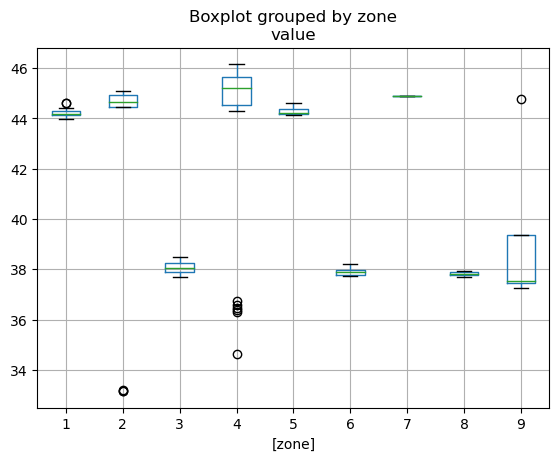

In [13]:
park_bp = plot.plot_boxplot('data/test_park.geojson', 'data/test_l8_lst.tiff')

C:\Users\Vinamra.Bharadwaj\anaconda3\envs\py310\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


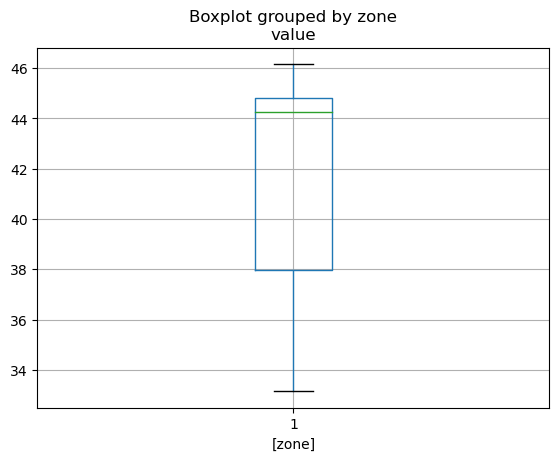

In [14]:
allpark_bp = plot.plot_boxplot('data/test_park_dissolve.geojson', 'data/test_l8_lst.tiff')

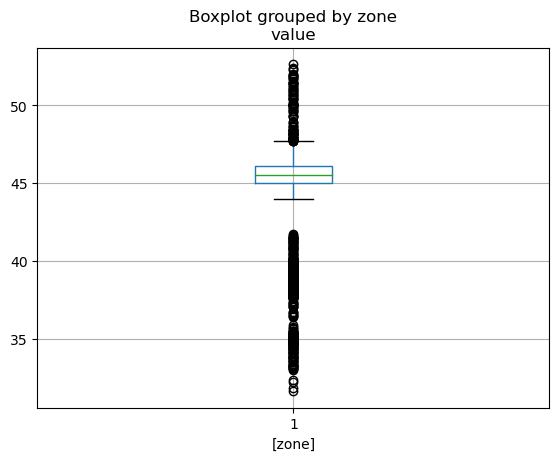

In [15]:
nonpark_bp = plot.plot_boxplot('data/test_non_park.geojson', 'data/test_l8_lst.tiff')

In [16]:
plot.plot_ee_image(l8_lst, boundary_path, [31, 52], ['blue', 'white', 'red'], display_name='L8_LST')

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [17]:
plot.plot_ee_fc('data/test_park.geojson', zoom = 15, display_name='parks')

Map(center=[23.006067069824713, 72.54731946382225], controls=(ZoomControl(options=['position', 'zoom_in_text',…